In [1]:
import random
import numpy as np
import pandas as pd
from scipy import stats

In [2]:
data=pd.read_csv('HR.csv')

In [3]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Находим среднюю, отклонение, медиану(50%), мин, макс

In [4]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


найдем моду для каждого столбца

In [5]:
[stats.mode(data[data.columns[x]])[0][0] for x in range(len(data.columns))]

C:\Users\volko\Anaconda3\lib\site-packages\scipy\stats\stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


[0.1, 0.55, 4, 135, 3, 0, 0, 0, 'sales', 'low']

In [6]:
corr = data.corr()
corr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


In [7]:
import seaborn as sns

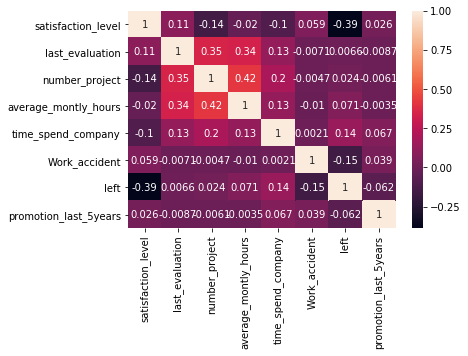

In [8]:
sns.heatmap(corr, annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

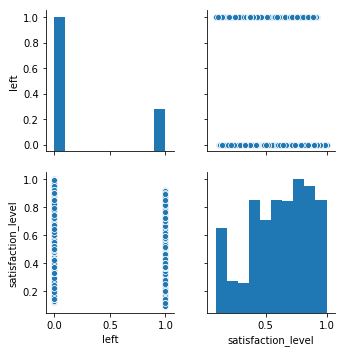

In [9]:
sns.pairplot(data, vars=['left', 'satisfaction_level'],
                 kind='scatter')

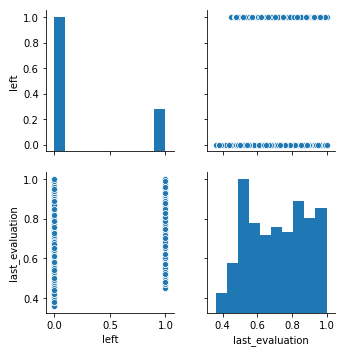

In [10]:
sns.pairplot(data, vars=['left', 'last_evaluation'],
                 kind='scatter')

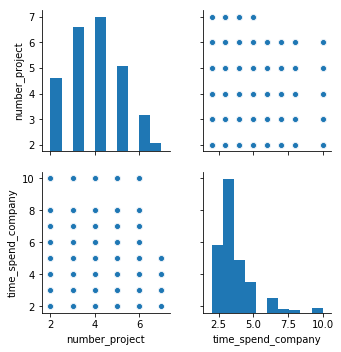

In [11]:
sns.pairplot(data, vars=['number_project', 'time_spend_company'],
                 kind='scatter')

In [12]:
stats.ttest_ind(data['number_project'], data['time_spend_company'])

Ttest_indResult(statistic=19.536753519083355, pvalue=1.7938911515379e-84)

In [13]:
stats.ttest_ind(data['satisfaction_level'], data['last_evaluation'])

Ttest_indResult(statistic=-41.89868154070206, pvalue=0.0)

In [14]:
stats.ttest_ind(data['number_project'], data['last_evaluation'])

Ttest_indResult(statistic=303.8042100031241, pvalue=0.0)

In [15]:
sal=data['salary']
salary=[]
for i in sal:
    if i=='low':
        salary.append(0)
    if i=='medium':
        salary.append(1)
    if i=='high':
        salary.append(2)

In [16]:
stats.ttest_ind(data['satisfaction_level'], salary)

Ttest_indResult(statistic=3.2458093631524347, pvalue=0.0011724564829778015)

In [17]:
data.groupby('sales').count()['number_project']

sales
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
Name: number_project, dtype: int64

In [18]:
import matplotlib.pyplot as plt

salary
low       7316
medium    6446
high      1237
Name: number_project, dtype: int64


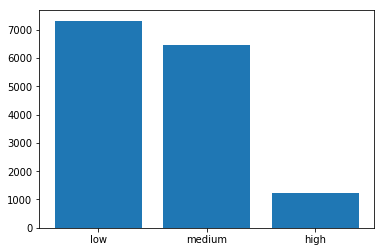

In [32]:
salary2=data.groupby('salary').count()['number_project'].sort_values(ascending=False)
salary_name=['low', 'medium','high']
plt.bar(np.arange(len(salary2)),salary2)
plt.xticks(np.arange(len(salary2)),salary_name)
print(salary2)

('accounting', 'medium')
['IT high', 'IT low', 'IT medium', 'RandD high', 'RandD low', 'RandD medium', 'accounting high', 'accounting low', 'accounting medium', 'hr high', 'hr low', 'hr medium', 'management high', 'management low', 'management medium', 'marketing high', 'marketing low', 'marketing medium', 'product_mng high', 'product_mng low', 'product_mng medium', 'sales high', 'sales low', 'sales medium', 'support high', 'support low', 'support medium', 'technical high', 'technical low', 'technical medium']
sales        salary
IT           high        83
             low        609
             medium     535
RandD        high        51
             low        364
             medium     372
accounting   high        74
             low        358
             medium     335
hr           high        45
             low        335
             medium     359
management   high       225
             low        180
             medium     225
marketing    high        80
             low

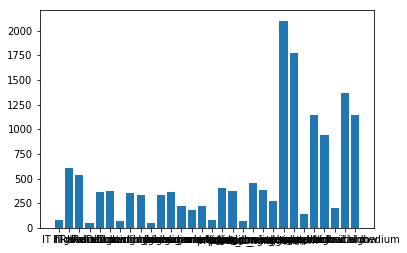

In [49]:
salary3=data.groupby(['sales','salary']).count()['number_project']
salary_name=[]
print(salary3.index[8])
for i in salary3.index:
    a=i[0]+' '+i[1]
    salary_name.append(a)
print(salary_name)
plt.bar(np.arange(len(salary3)),salary3)
plt.xticks(np.arange(len(salary3)),salary_name)
print(salary3)


In [52]:
data.groupby('left').count()['number_project'][1]

3571

In [67]:
data[data['left']==1]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [70]:
group1=data[data['left']==1]['last_evaluation']
group2=data[data['left']==0]['last_evaluation']
stats.ttest_ind(group1, group2)

Ttest_indResult(statistic=0.8042416167796329, pvalue=0.4212701963735056)

In [71]:
group3=data[data['left']==1]['satisfaction_level']
group4=data[data['left']==0]['satisfaction_level']
stats.ttest_ind(group3, group4)

Ttest_indResult(statistic=-51.61280155890104, pvalue=0.0)

In [80]:
group3=data[data['left']==1]['time_spend_company']
group4=data[data['left']==0]['time_spend_company']
print(stats.ttest_ind(group3, group4))
print(np.mean(group3))
print (np.mean(group4))

Ttest_indResult(statistic=17.924210234916142, pvalue=4.207680457692835e-71)
3.876505180621675
3.3800315015750786


In [73]:
group3=data[data['left']==1]['promotion_last_5years']
group4=data[data['left']==0]['promotion_last_5years']
stats.ttest_ind(group3, group4)

Ttest_indResult(statistic=-7.581195349367637, pvalue=3.624047224146943e-14)

Компанию покидали люди, которые долго работали в компании и у них не было повышения.